<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Visualize-Singular-Vectors-&amp;-Properties" data-toc-modified-id="Visualize-Singular-Vectors-&amp;-Properties-1">Visualize Singular Vectors &amp; Properties</a></span></li><li><span><a href="#Visualize-SVD-/-EVD-Equivalence" data-toc-modified-id="Visualize-SVD-/-EVD-Equivalence-2">Visualize SVD / EVD Equivalence</a></span></li><li><span><a href="#Visualize-SVD-Component-Operations" data-toc-modified-id="Visualize-SVD-Component-Operations-3">Visualize SVD Component Operations</a></span></li><li><span><a href="#Psuedo-Inverse-&amp;-Least-Squares" data-toc-modified-id="Psuedo-Inverse-&amp;-Least-Squares-4">Psuedo Inverse &amp; Least Squares</a></span></li><li><span><a href="#Data-Compression-and-Reconstruction" data-toc-modified-id="Data-Compression-and-Reconstruction-5">Data Compression and Reconstruction</a></span><ul class="toc-item"><li><span><a href="#Demonstration-of-Low-rank-approximation" data-toc-modified-id="Demonstration-of-Low-rank-approximation-5.1">Demonstration of Low-rank approximation</a></span></li></ul></li><li><span><a href="#Singular-Values-and-information-content-of-an-image" data-toc-modified-id="Singular-Values-and-information-content-of-an-image-6">Singular Values and information content of an image</a></span></li><li><span><a href="#Image-compression-using-low-rank-approximation-via-SVD" data-toc-modified-id="Image-compression-using-low-rank-approximation-via-SVD-7">Image compression using low-rank approximation via SVD</a></span></li><li><span><a href="#SVD-for-data-imputation" data-toc-modified-id="SVD-for-data-imputation-8">SVD for data imputation</a></span></li><li><span><a href="#Relationship-to-PCA" data-toc-modified-id="Relationship-to-PCA-9">Relationship to PCA</a></span></li><li><span><a href="#SVD-for-word-embeddings" data-toc-modified-id="SVD-for-word-embeddings-10">SVD for word embeddings</a></span></li></ul></div>

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/dustinstansbury/.local/share/virtualenvs/notebooks-I_qBHKH9/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['svd']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
import numpy as np
PRECISION = 3

def svd(X):
    """Returns the Singular Value Decomposition of X (via numpy),
    returned in matrix format
    """
    U, s, Vt = np.linalg.svd(X)
    
    # Put the vector singular values into a padded matrix
    S = np.zeros(X.shape)
    np.fill_diagonal(S, s)
    
    # Rounding for display
    return np.round(U, PRECISION), np.round(S, PRECISION), np.round(Vt.T, PRECISION)

In [9]:
from matplotlib import pyplot as plt
plt.rcParams['image.cmap'] = 'RdBu_r'

def visualize_svd(m, n, fig_height=5):
    """Plot the Singular Value Decomposition of a random matrix of size `m x n`
    
    Parameters
    ----------
    m : int
        The number of rows in the random matrix
    n : int
        The number of columns
    fig_height : float
        Fiddle parameter to make figures render better (because I'm lazy and don't
        want to work out the scaling arithmetic).
    """
    np.random.seed(123)

    M = np.random.randn(m, n)
    U, S, V = svd(M)
    
    fig, axs = plt.subplots(1, 7, figsize=(12, fig_height))

    plt.sca(axs[0])
    plt.imshow(M)
    plt.title(f'$M \in \mathbb{{R}}^{{{{{m}}} \\times {{{n}}}}}$', fontsize=14)

    plt.sca(axs[1])
    plt.text(.25, .25, '=', fontsize=48)
    plt.axis('off')

    plt.sca(axs[2])
    plt.imshow(U)
    plt.title(f'$U \in \mathbb{{R}}^{{{{{m}}} \\times {{{m}}}}}$', fontsize=14)

    plt.sca(axs[3])
    plt.text(.25, .25, '$\\times$', fontsize=48)
    plt.axis('off')

    plt.sca(axs[4])
    plt.imshow(S)
    plt.title(f'$S \in \mathbb{{R}}^{{{{{m}}} \\times {{{n}}}}}$')

    plt.sca(axs[5])
    plt.text(0.25, .25, '$\\times$', fontsize=48)
    plt.axis('off')

    plt.sca(axs[6])
    cmap = plt.imshow(V.T)
    plt.colorbar(cmap, ax=axs, orientation='horizontal', aspect=50)
    plt.title(f'$V^T \in \mathbb{{R}}^{{{{{n}}} \\times {{{n}}}}}$', fontsize=14)

    plt.suptitle(f'SVD Components $m={{{m}}}, n={{{n}}}$', fontsize=18)
    
    fname = f'/tmp/svd-{m}x{n}.png'
    plt.savefig(fname, bbox_inches='tight', dpi=300)
    print(fname)

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


/tmp/svd-4x4.png


Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


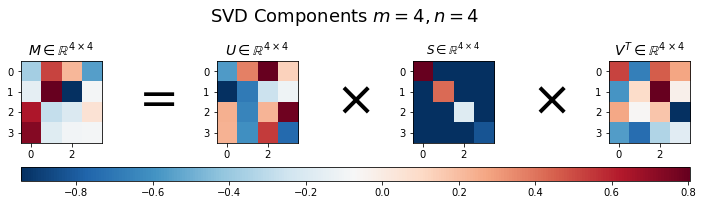

In [10]:
visualize_svd(4, 4, fig_height=3)

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


/tmp/svd-8x4.png


Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


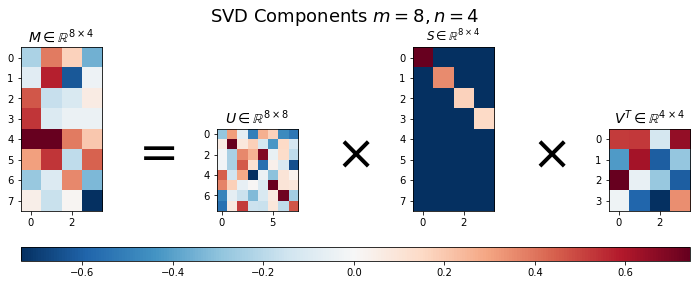

In [11]:
visualize_svd(8, 4, 4.5)

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


/tmp/svd-4x8.png


Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


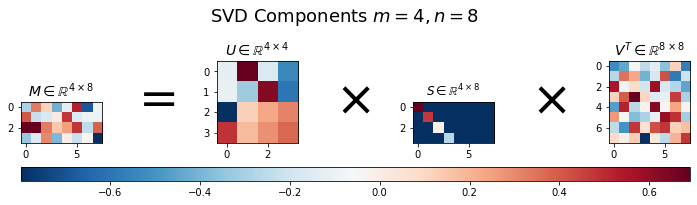

In [12]:
visualize_svd(4, 8, 3)

## Visualize Singular Vectors & Properties

Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral
Substituting symbol R from STIXGeneral


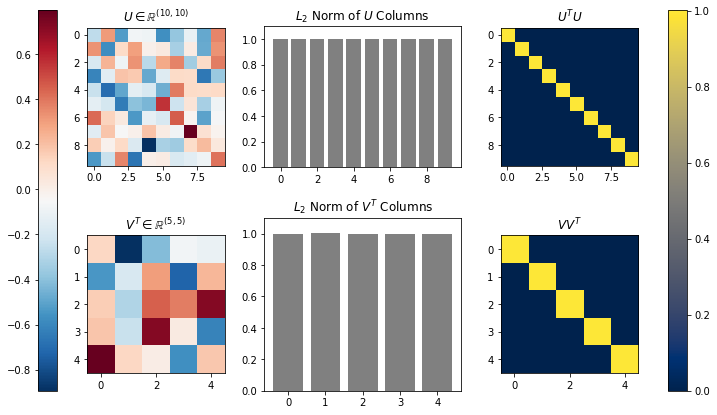

In [13]:
# Generate random m x n matrix, X

def matrix_column_l2_norm(M):
    """Returns the L2 norm of each column of matrix M, """
    return (M ** 2).sum(0)

m = 10
n = 5
np.random.seed(123)
M = np.random.randn(m, n)

# Run the SVD
U, S, V = svd(M)

# Calculate L2 norm of U and V^T
U_norm = matrix_column_l2_norm(U)
V_norm = matrix_column_l2_norm(V.T)

# Visualizations
fig, axs = plt.subplots(2, 3, figsize=(12, 7))

## Matrix U
plt.sca(axs[0][0])
plt.imshow(U, interpolation='nearest')
plt.title(f'$U \in \mathbb{{R}}^{{{U.shape}}}$')

## L2 norm of U's columns
plt.sca(axs[0][1])
plt.gca().set_aspect(7.)
plt.bar(range(m), U_norm, facecolor='gray')
plt.ylim([0, 1.1])
plt.title('$L_2$ Norm of $U$ Columns')

## U^TU is a Identity Matrix
plt.sca(axs[0][2])
plt.imshow(U.T @ U, cmap='cividis', interpolation='nearest')
plt.title('$U^TU$')

## Matrix V
plt.sca(axs[1][0])
cax1 = plt.imshow(V.T, interpolation='nearest')
plt.title(f'$V^T \in \mathbb{{R}}^{{{V.shape}}}$')

## L2 norm of V^T's columns
plt.sca(axs[1][1])
plt.bar(range(n), V_norm, facecolor='gray')
plt.ylim([0, 1.1])
plt.title('$L_2$ Norm of $V^T$ Columns')

## VV^T is a Identity Matrix
plt.sca(axs[1][2])
cax2 = plt.imshow(V @ V.T, cmap='cividis', interpolation='nearest')
plt.title('$VV^T$')

## Set Colorbars
fig.colorbar(cax1, ax=[axs[0][0], axs[1][0]], location='left', pad=0.15)
fig.colorbar(cax2, ax=[axs[0][2], axs[1][2]], location='right', pad=0.15)

plt.savefig('/tmp/svd-u-v-properties.png', bbox_inches='tight', dpi=300)

## Visualize SVD / EVD Equivalence

$ X^TX = (USV^T)^T USV^T \\ 
= V S^T U^T  U S V^T \\ 
= V S^T I S V^T \\ 
= V S^T  S V^T$


$ XX^T =  USV^T (USV^T)^T \\
= U S V^T  V S^T U^T \\
= U S I S^T U^T \\
= U S S^T U^T$

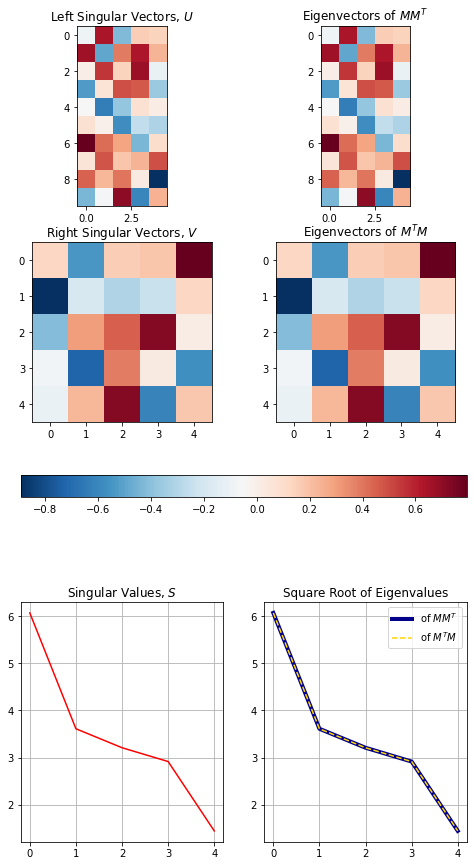

In [14]:
def evd(M):
    """Returns the Eigenvalue Decomposition of M (via numpy), with eigenvectors
    sorted by descending eigenvalues
    """
    def sort_eigs(evals, evecs):
        sort_idx = np.argsort(evals)[::-1]
        evals_sorted = np.round(np.real(evals[sort_idx]), PRECISION)
        evecs_sorted = np.round(np.real(evecs[:, sort_idx]), PRECISION)
        return evals_sorted, evecs_sorted

    return sort_eigs(*np.linalg.eig(M))

def align_eigen_vectors(E, M):
    """Eigenvector solutions are not unique, so check sign to give consistent results with SVD
    """
    for dim in range(E.shape[1]):
        if np.sign(M[0, dim]) != np.sign(E[0, dim]):
            E[:, dim] = E[:, dim] * -1
    return E

def matrix_column_l2_norm(M):
    """Returns the L2 norm of each column of matrix M, """
    return (M ** 2).sum(0)

eigen_values_MtM, eigen_vectors_MtM = evd(M.T @ M)
eigen_values_MMt, eigen_vectors_MMt = evd(M @ M.T)

fig, axs = plt.subplots(3, 2, figsize=(8, 15))
plt.sca(axs[0][0])
# M isn't symmetric, so we only show results up to the smallest dimension, n
cax = plt.imshow(U[:,:n])
plt.title("Left Singular Vectors, $U$")

plt.sca(axs[0][1])
plt.imshow(align_eigen_vectors(eigen_vectors_MMt[:,:n], U[:,:n]))
plt.title("Eigenvectors of $MM^T$")

plt.sca(axs[1][0])
cax = plt.imshow(V)
plt.title("Right Singular Vectors, $V$")

plt.sca(axs[1][1])
plt.imshow(align_eigen_vectors(eigen_vectors_MtM, V))
plt.title("Eigenvectors of $M^TM$")
fig.colorbar(cax, ax=axs[:2], orientation='horizontal', pad=0.1);

plt.sca(axs[2][0])
plt.plot(np.diag(S), color='red')
plt.grid()
plt.title('Singular Values, $S$')

plt.sca(axs[2][1])
plt.plot(eigen_values_MMt[:n] ** .5, c='darkblue', linewidth=4, label='of $MM^T$')
plt.plot(eigen_values_MtM[:n] ** .5, '--', c='gold', label='of $M^TM$')
plt.grid()
plt.title('Square Root of Eigenvalues')
plt.legend()

plt.savefig('/tmp/svd-eigen-decomposition-equivalence.png', bbox_inches='tight', dpi=300)

## Visualize SVD Component Operations

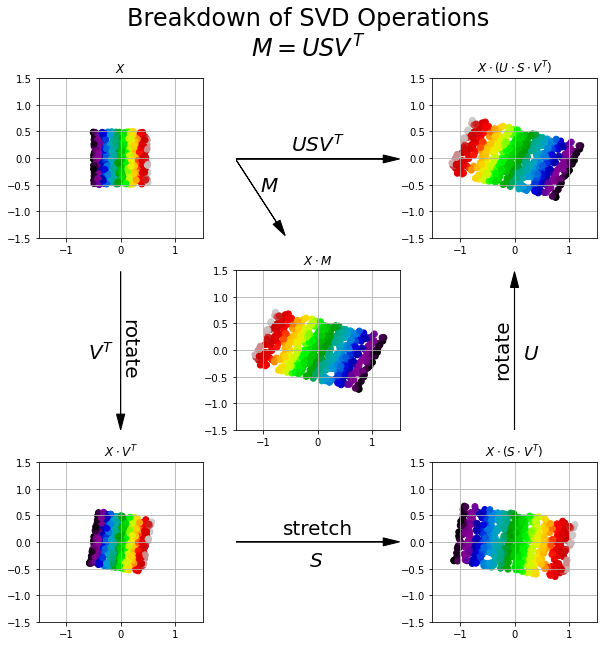

In [15]:
# Generate andom observations matrix (uniform distribution)
np.random.seed(123)  # Repeatability
n_observations = 500
n_dim = 2

X = np.random.rand(n_observations, n_dim) - .5

# Transformation Matrix
M = np.array(
    [
        [-2., .5],
        [-.5, -1]
    ]
)

colors = X[:, 0]
cmap = 'nipy_spectral'

# SVD of Transformation Matrix
U, S, V = svd(M)

# Visualization
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
plt.suptitle('Breakdown of SVD Operations\n$M = U  S  V^T$', fontsize=24, ha='center')

## Data
### Original X
plt.sca(axs[0][0])
plt.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.grid()
plt.title("$X$")

### X * M (matrix transformation)
XM = X @ M
plt.sca(axs[1][1])
plt.scatter(XM[:, 0], XM[:, 1], c=colors, cmap=cmap)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.grid()
plt.title("$X \cdot M$")

### X * V' (rotate)
XVt = X @ V.T
plt.sca(axs[2][0])
plt.scatter(XVt[:, 0], XVt[:, 1], c=colors, cmap=cmap)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.grid()
plt.title("$X \cdot V^T$")

### X * (S * V') (rotate and scale)
XSVt = X @ (S @ V.T)
plt.sca(axs[2][2])
plt.scatter(XSVt[:, 0], XSVt[:, 1], c=colors, cmap=cmap)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.grid()
plt.title("$X \cdot (S \cdot V^T)$")

### X * (U * S * V') (rotate, scale, and rotate)
XUSVt = X @ (U @ S @ V.T)
plt.sca(axs[0][2])
plt.scatter(XUSVt[:, 0], XUSVt[:, 1], c=colors, cmap=cmap)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.grid()
plt.title("$X \cdot (U \cdot S \cdot V^T)$")

## Operations/Arrows
### M
plt.sca(axs[0][1])
plt.arrow(.0, .5, .9, 0., capstyle='round', head_width=0.05, head_length=0.1, fc='black')
plt.arrow(.0, .5, .25, -.4, capstyle='round', head_width=0.05, head_length=0.1, fc='black')
plt.text(.15, .3, '$M$', fontsize=20)
plt.text(.5, .55, '$USV^T$', fontsize=20, ha='center')
plt.xlim([0., 1.])
plt.ylim([0., 1.01])
plt.axis('off')

### V'
plt.sca(axs[1][0])
plt.arrow(.5, 1., 0, -.9, capstyle='round', head_width=0.05, head_length=0.1, fc='black')
plt.text(.3, .45, '$V^T$', fontsize=20)
plt.text(.55, .35, 'rotate', fontsize=20, ha='center', rotation=-90)
plt.xlim([0., 1.])
plt.ylim([0., 1.01])
plt.axis('off')

### S
plt.sca(axs[2][1])
plt.arrow(.0, .5, .9, 0., capstyle='round', head_width=0.05, head_length=0.1, fc='black')
plt.text(.45, .35, '$S$', fontsize=20)
plt.text(.5, .55, 'stretch', fontsize=20, ha='center')
plt.xlim([0., 1.])
plt.ylim([0., 1.])
plt.axis('off')

### U
plt.sca(axs[1][2])
plt.arrow(.5, 0., 0, .9, capstyle='round', head_width=0.05, head_length=0.1, fc='black')
# plt.arrow(.5, 0., 0, .9, capstyle='round', fc='black')
plt.text(.55, .45, '$U$', fontsize=20)
plt.text(.43, .35, 'rotate', fontsize=20, ha='center', rotation=90)
plt.xlim([0., 1.])
plt.ylim([0., 1.01])
plt.axis('off')


plt.savefig('/tmp/svd-operations.png', bbox_inches='tight', dpi=300)


## Psuedo Inverse & Least Squares

In [12]:
np.linalg.inv(M)

array([[-0.44444444, -0.22222222],
       [ 0.22222222, -0.88888889]])

In [18]:
def pseudo_inverse_via_svd(X):
    def diagonal_pseudo_inverse(D):
        """Replaces the nonzero entries of diagonal matrix D with their reciprocal"""
        diags = np.diag(D)
        pinverse = np.zeros_like(D)
        np.fill_diagonal(pinverse, diags ** -1.)
        return pinverse.T  # non-square singular values align with U.T
    U, S, V = svd(X)
    return V @ diagonal_pseudo_inverse(S) @ U.T

print(np.linalg.inv(M))

print(pseudo_inverse_via_svd(M))

[[-0.44444444 -0.22222222]
 [ 0.22222222 -0.88888889]]
[[-0.44444364 -0.22197355]
 [ 0.22197355 -0.88887214]]


In [19]:
M_non_square = np.random.randn(4, 2)
PRECISION = 6
try:
    np.linalg.inv(M_non_square)
except Exception as e:
    print("Non-square matrices have no inverse...", e)
finally:
    print("\n...but they do have a pseudo-inverse, which we can calculate via SVD:")
    print(pseudo_inverse_via_svd(M_non_square))

print("\nNumpy pseudo-inverse provides similar results:\n", np.linalg.pinv(M_non_square))

Non-square matrices have no inverse... Last 2 dimensions of the array must be square

...but they do have a pseudo-inverse, which we can calculate via SVD:
[[-0.13836761  0.70853959 -0.5504225  -0.4265854 ]
 [-0.1482406  -0.10021696 -0.08299649 -0.36686834]]

Numpy pseudo-inverse provides similar results:
 [[-0.13836806  0.7085401  -0.55042271 -0.42658598]
 [-0.14824084 -0.10021714 -0.08299636 -0.3668684 ]]


In [20]:
np.linalg.norm(np.linalg.pinv(M_non_square)) * np.linalg.norm(M_non_square)

3.030123256603139

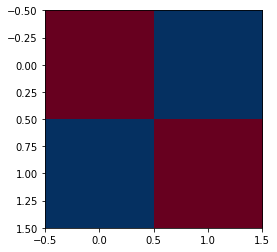

In [21]:
plt.imshow(np.linalg.inv(M).dot(M))

In [22]:
beta = np.random.rand(5)
X = np.random.randn(10, 5)
y = X @ beta 

print(beta)
print(pseudo_inverse_via_svd(X) @ y)
print(np.linalg.inv((X.T @ X)) @ X.T @ y)

[0.57220384 0.10487129 0.64997129 0.34369768 0.18292129]
[0.57220315 0.10487124 0.64997153 0.34369793 0.18292127]
[0.57220384 0.10487129 0.64997129 0.34369768 0.18292129]


## Data Compression and Reconstruction

### Demonstration of Low-rank approximation

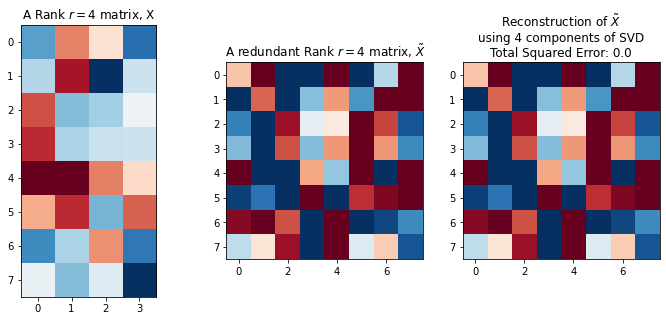

In [274]:
import matplotlib as plt
import numpy as np

np.random.seed(123) # Repeatability
MATRIX_RANK = 4

# Create a random matrix, which will have independent columns
# and thus a rank equal to the number of columns
X_orig = np.random.randn(8, MATRIX_RANK)
X_orig_rank = np.linalg.matrix_rank(X_orig)

# Create a new redundant matrix with twice as many columns, but new columns are
# simply a linear scaling of original matrix
X_redundant = np.hstack([-2 * X_orig, 2 * X_orig])

# Permute columns of redundant matrix
X_redundant = X_redundant[:, np.random.permutation(np.arange(X_redundant.shape[1]))]
X_redundant_rank = np.linalg.matrix_rank(X_redundant)

# Run SVD on redundant matrix, we'll use this for LRA
U, S, V = np.linalg.svd(X_redundant)

# Low-rank reconstruction (exact in this case)
X_redundant_reconstructed = U[:, :MATRIX_RANK] * S[:MATRIX_RANK] @ V[:MATRIX_RANK, :]

reconstruction_error = np.sum((X_redundant - X_redundant_reconstructed)**2)
                        
# Visualizations                     
## Original matrix
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
plt.sca(axs[0])
plt.imshow(X_orig)
plt.clim([-2, 2])
plt.title(f"A Rank $r=${X_orig_rank} matrix, X")

## Redundant matrix
plt.sca(axs[1])
plt.imshow(X_redundant)
plt.clim([-2, 2])
plt.title(f"A redundant Rank $r=${X_redundant_rank} matrix, $\\tilde X$")

## Low-rank approximation (exact reconstruction)
plt.sca(axs[2])
plt.imshow(X_redundant_reconstructed)
plt.clim([-2, 2])
plt.title(f"Reconstruction of $\\tilde X$\nusing {MATRIX_RANK} components of SVD\nTotal Squared Error: {reconstruction_error:1.1f}")


plt.savefig('/tmp/matrix-low-rank-approximation.png', bbox_inches='tight', dpi=300)

## Singular Values and information content of an image

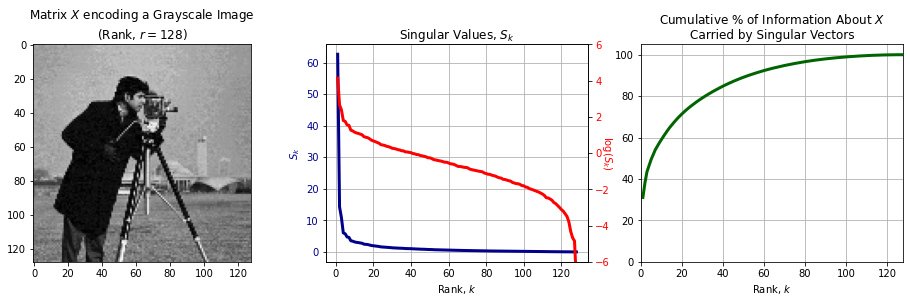

In [276]:
# Load image
img = plt.imread("../assets/images/svd-data-compression/cameraman.png")

# Donwsample and encode RGBa image as matrix of intensities, X
DOWNSAMPLE = 4
R = img[::DOWNSAMPLE, ::DOWNSAMPLE, 0]
G = img[::DOWNSAMPLE, ::DOWNSAMPLE, 1]
B = img[::DOWNSAMPLE, ::DOWNSAMPLE, 2] 
X = 0.2989 * R + 0.5870 * G + 0.1140 * B

# Calculate the rank of the data matrix, X
img_rank = np.linalg.matrix_rank(X, 0.)

# Run SVD on Image
U, S, V = np.linalg.svd(X)

# Calculate the cumulative variance explained by each singular value
total_S = S.sum()
n_components = len(S)
component_idx = range(1,  n_components + 1)
info_retained = 100 * np.cumsum(S) / total_S

# Visualizations
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

## Raw Image, X
plt.sca(axs[0])
plt.imshow(X, cmap='gray')
plt.title(f"Matrix $X$ encoding a Grayscale Image\n(Rank, $r=${img_rank})")

## Singular values as function of rank
plt.sca(axs[1])

### Raw singular values
plt.plot(component_idx, S, label='Singular Values of $$X$$', color='darkblue', linewidth=3)
plt.grid()
plt.xlabel("Rank, $k$")
plt.ylabel('$S_k$', color='darkblue')
plt.tick_params(axis='y', labelcolor='darkblue')
plt.title('Singular Values, $S_k$')

### log(singular values)
twax = plt.gca().twinx()  # twin axes that shares the same x-axis
twax.plot(component_idx, np.log(S), color='red', linewidth=3)
plt.ylabel('$\log(S_k)$\n', color='red', rotation=270)
plt.tick_params(axis='y', labelcolor='red')
plt.ylim([-6, 6])

## Information retained as function of rank
plt.sca(axs[2])
plt.plot(component_idx, info_retained, color='darkgreen', linewidth=3)
plt.xlim(0, n_components)
plt.ylim([0, 105])
plt.xlabel("Rank, $k$")
plt.grid()
plt.title('Cumulative % of Information About $X$\nCarried by Singular Vectors')

plt.savefig('/tmp/image-singular-values.png', bbox_inches='tight', dpi=300)

## Image compression using low-rank approximation via SVD

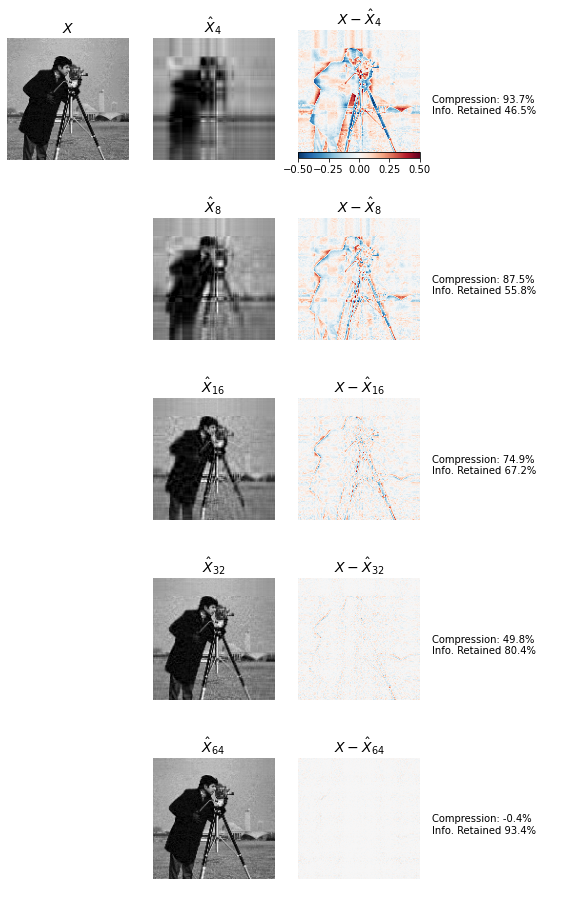

In [97]:
plt.rcParams['image.cmap'] = 'RdBu_r'

## Image Reconstruction
N = 5
fig, axs = plt.subplots(N, 4, figsize=(10, 16))
plt.sca(axs[0][0])
plt.imshow(X, cmap='gray')
plt.clim([0, 1.])
plt.axis('off')
plt.title("$X$", fontsize=14)

# Reconstruct image with increasing number of singular vectors/values
for power in range(1, N + 1):
    rank = 2 ** (1 + power)
        
    # Compressed/Reconstructed Image
    X_reconstruction = U[:, :rank] * S[:rank] @ V[:rank,:]
    
    # Calculate number of floats required to store compressed image
    rank_data_compression = 100 * (1. - (1. * U[:, :rank].size + S[:rank].size + V[:rank,:].size) / X.size)
    
    # Variance of original image explained by n components
    rank_info_retained = info_retained[rank-1]
    
    # Visualizations
    ## Original Image
    if power > 1:
        plt.sca(axs[power-1][0])
        plt.cla()
        plt.axis('off')

    ## Image reconstruction
    plt.sca(axs[power-1][1])
    plt.imshow(X_reconstruction, cmap='gray')
    plt.clim([0, 1.])
    plt.axis('off')
    plt.title(f'$\hat{{X}}_{{{rank}}}$', fontsize=14)
    
    ## Reconstruction error
    plt.sca(axs[power-1][2])
    cax = plt.imshow(X - X_reconstruction)
    plt.clim([-.5, .5])
    plt.axis('off')
    plt.title(f'$X -\hat{{X}}_{{{rank}}}$', fontsize=14)

    ## Compression/reconstruction info
    plt.sca(axs[power-1][3])
    compression_text = f'Compression: {rank_data_compression:1.1f}%\nInfo. Retained {rank_info_retained:1.1f}%'
    plt.text(-.1, .4, compression_text)
    plt.axis('off')
    
fig.colorbar(cax, ax=axs[0][2], pad=.0, orientation='horizontal')


plt.savefig('/tmp/svd-image-reconstruction.png', bbox_inches='tight', dpi=300)

## SVD for data imputation
Troyanskaya, O., Cantor, M., Sherlock, G., Brown, P., Hastie, T., Tibshirani, R., Botstein, D. and Altman, R.B. (2001). Missing value estimation methods for DNA microarrays. Bioinformatics 17(6), 520--525.

set RSS := $\infty$

while RSS > tol:
- impute using zero or column mean
- calculate SVD on inmputed data
- reconstruct data using K components
- Calculate RSS on reconstruction


/Users/dustinstansbury/.local/share/virtualenvs/notebooks-I_qBHKH9/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu_r"))


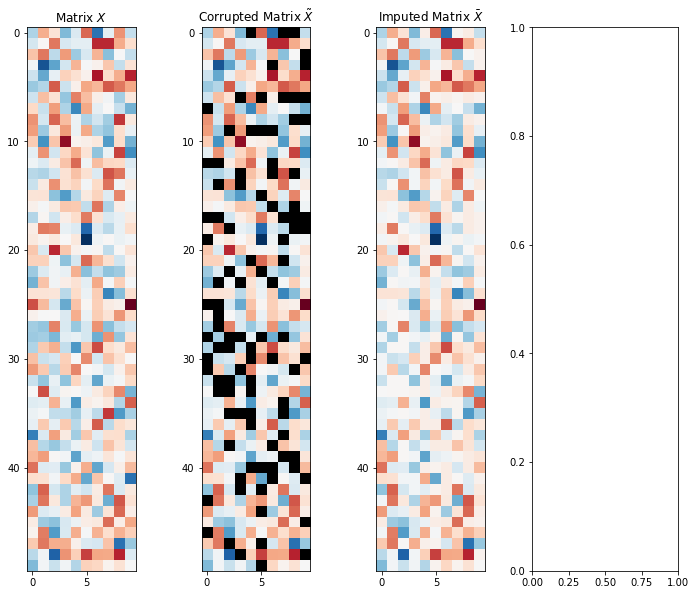

In [25]:
import pandas as pd
from sklearn.impute import SimpleImputer

np.random.seed(123)
n_obs = 50
n_dim = 10
X_orig = pd.DataFrame(np.random.randn(n_obs, n_dim))
X_corrupted = X_orig.copy()

# Corrupt the original
for col in X_corrupted.columns:
    X_corrupted.loc[X_corrupted.sample(frac=0.2).index, col] = np.nan
    
fig, ax = plt.subplots(1, 4, figsize=(12, 10))

plt.sca(ax[0])
plt.imshow(X_orig)
plt.title('Matrix $X$')

plt.sca(ax[1])
plt.imshow(X_corrupted)
plt.title(r'Corrupted Matrix $\tilde{X}$')

X_imputed = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(X_corrupted)

plt.sca(ax[2])
plt.imshow(X_imputed)
plt.title(r'Imputed Matrix $\bar{X}$')


current_cmap = plt.cm.get_cmap()
current_cmap.set_bad(color='black')


In [26]:
M = np.random.randn(3, 3)
print('\nBrute Force:\n', M @ M @ M)
print('\nNumpy:\n', np.linalg.matrix_power(M, 3))

# Diagonalize M
D, P = np.linalg.eig(M)
D = np.diag(D)
print('\nUsing Diagonalization:\n', np.real(P @ D**3 @ np.linalg.inv(P)))


Brute Force:
 [[  0.51642314 -13.28410833  -8.42166138]
 [  0.40479756  -5.03506728  -4.32243842]
 [  0.53498544  13.24358062   3.97550331]]

Numpy:
 [[  0.51642314 -13.28410833  -8.42166138]
 [  0.40479756  -5.03506728  -4.32243842]
 [  0.53498544  13.24358062   3.97550331]]

Using Diagonalization:
 [[  0.51642314 -13.28410833  -8.42166138]
 [  0.40479756  -5.03506728  -4.32243842]
 [  0.53498544  13.24358062   3.97550331]]


## Relationship to PCA

In [27]:
U

array([[-0.987, -0.16 ],
       [-0.16 ,  0.987]])

In [28]:
np.linalg.inv(U)

array([[-0.98722805, -0.16003697],
       [-0.16003697,  0.98722805]])

In [29]:
V

array([[ 0.987, -0.16 ],
       [-0.16 , -0.987]])

## SVD for word embeddings

In [2]:
import pandas as pd
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
STOPWORDS = stopwords.words('english')
IGNORE = set(list(punctuation) + STOPWORDS)

def preprocess(document):
    """Simple preprocessing"""
    return [w.lower() for w in word_tokenize(document) if w not in IGNORE]

data = pd.read_csv('https://raw.githubusercontent.com/dustinstansbury/toy-datasets/master/reuters-content.csv')
corpus = [preprocess(d) for d in data.dropna()['text'].tolist()]

In [3]:
len(corpus)

19043

In [4]:
from collections import Counter
class UnigramFrequencies(object):
    """Simple Unigram frequency calculator"""
    def __init__(self, documents=None):
        self.unigram_counts = Counter()
        
        for ii, doc in enumerate(documents):
            self.unigram_counts.update(doc)

        self.token_to_idx = {tok: indx for indx, tok in enumerate(self.unigram_counts.keys())}
        self.idx_to_token = {indx: tok for tok,indx in self.token_to_idx.items()}
            
    def __getitem__(self, item):
        if isinstance(item, str):
            return self.unigram_counts[item]
        elif isinstance(item, int):
            return self.unigram_counts[self.idx_to_token[item]]
        raise ValueError(f"type {type(item)} not supported")

In [5]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse import linalg 

class SkipgramFrequencies(object):
    """Simple skipgrams frequency calculator
    
    Parameters
    ----------
    documents : list[list[str]]
        A list of documents, each document being a list of strings
    backward_window_size : int
        The number of words to the left used to define the context window
    forward_window_size : int
        The number of words to the right used to define the context window
    """
    def __init__(
        self,
        documents,
        backward_window_size=2,
        forward_window_size=2
    ):
        self.backward_window_size = backward_window_size
        self.forward_window_size = forward_window_size
        self.skipgram_counts = Counter()

        # Independent word frequencies
        self.unigrams = UnigramFrequencies(documents)
        
        # Conditional word-context frequencies
        for doc_idx, doc in enumerate(documents):
            token_idxs = [self.token_to_idx[token] for token in doc]
            n_document_tokens = len(token_idxs)
                       
            for token_idx, _ in enumerate(token_idxs):
                context_window_start = max(0, token_idx - self.backward_window_size)
                context_window_end = min(n_document_tokens - 1, token_idx + self.forward_window_size) + 1
                context_idxs = [
                    context_idx for context_idx in range(context_window_start, context_window_end) 
                    if context_idx != token_idx
                ]
                for context_idx in context_idxs:
                    skipgram = (token_idxs[token_idx], token_idxs[context_idx])
                    self.skipgram_counts[skipgram] += 1
                
    @property
    def idx_to_token(self):
        return self.unigrams.idx_to_token
    
    @property
    def token_to_idx(self):
        return self.unigrams.token_to_idx
            
    
def calculate_frequency_matrix(skipgrams, recalculate=False):
    """Given a SkipgramFrequencies instance, returns the associated frequency counts
    as a sparse matrix
    """
    row_idxs = []
    col_idxs = []
    matrix_values = []
    for (token_idx_1, token_idx_2), skipgram_count in skipgrams.skipgram_counts.items():
        row_idxs.append(token_idx_1)
        col_idxs.append(token_idx_2)
        matrix_values.append(skipgram_count)

    return csr_matrix((matrix_values, (row_idxs, col_idxs)))

    
def calculate_pmi_matrix(skipgrams, enforce_positive=False, recalculate=False):
    """Given a SkipgramFrequencies instance, returns the associated pointwise
    mutual information (PMI) matrix in sparse (CSR) format
    """
    # Get frequency matrix
    frequency_matrix = calculate_frequency_matrix(skipgrams)

    # Precalculate some resusable things
    n_skipgrams = frequency_matrix.sum()
    word_sums = np.array(frequency_matrix.sum(axis=0)).flatten()
    context_sums = np.array(frequency_matrix.sum(axis=1)).flatten()
    
    # Sparse matrix components
    row_idxs = []
    col_idxs = []
    matrix_values = []

    for (skipgram_word_idx, skipgram_context_idx), skipgram_count in skipgrams.skipgram_counts.items():
         # p(w, c)
        join_probability = skipgram_count / n_skipgrams

        # p(w)
        n_word = context_sums[skipgram_word_idx]
        p_word = n_word / n_skipgrams

        # p(c)
        n_context = word_sums[skipgram_context_idx]
        p_context = n_context / n_skipgrams 
    
        # Pointwise mututal information = log[p(w, c) / p(w)p(c)]
        pmi = np.log(join_probability / (p_word * p_context))
        
        # Update sparse matrix entries
        row_idxs.append(skipgram_word_idx)
        col_idxs.append(skipgram_context_idx)
        matrix_values.append(pmi)

    return csr_matrix((matrix_values, (row_idxs, col_idxs)))


def calculate_word_vectors(skipgrams, n_dim=128):
    pmi_matrix = calculate_pmi_matrix(skipgrams)
    U, S, V = linalg.svds(pmi_matrix, n_dim)
    
    # Use row-vectors scaled by singular values as embeddings
    U_scaled = U * np.sqrt(S)
    
    # Normalize the embedding vectors to have unit norm
    return U_scaled / np.linalg.norm(U_scaled, axis=1)[:, None]
    


In [6]:
sgs = SkipgramFrequencies(corpus)

In [7]:
embeddings_matrix = calculate_word_vectors(sgs)

In [8]:
from scipy.spatial.distance import cosine as cosine_similarity

class MatrixNearestNeighborsIndex(object):
    """Simple nearest neighbors index based on a pre-calculated matrix.
    
    Parameters
    -----------
    matrix : ndarry or sparse array
        n_items x n_dims matrix of item represation
    idx_to_token : dict
        Mapping between matrix row indices and tokens
    token_to_idx : dict
        Mapping between tokens and matrix row indices
    """
    def __init__(self, matrix, idx_to_token, token_to_idx):
        self.matrix = matrix
        self.idx_to_token = idx_to_token
        self.token_to_idx = token_to_idx
    
    def most_similar_from_label(self, query_label, n=20, return_self=False):
        query_idx = self.token_to_idx.get(query_label, None)
        if query_idx is not None:
            return self.most_similar_from_index(query_idx, n=n, return_self=return_self)
    
    def most_similar_from_index(self, query_idx, n=20, return_self=False):
        query_vector = self.get_vector_from_index(query_idx)
        return self.most_similar_from_vector(query_vector, n=n, query_idx=query_idx if not return_self else None)
        
    def most_similar_from_vector(self, query_vector, n=20, query_idx=None):
        if isinstance(self.matrix, csr_matrix):
            sims = cosine_similarity(self.matrix, query_vector).flatten()
        else:
            sims = self.matrix.dot(query_vector)
        
        sim_idxs = np.argsort(-sims)[:n + 1]
        sim_idxs = [idx for idx in sim_idxs if (query_idx is None or (query_idx is not None) and (idx != query_idx))]
        sim_word_scores = [(self.idx_to_token[sim_idx], sims[sim_idx]) for sim_idx in sim_idxs[:n]]
        return sim_word_scores
    
    def get_vector_from_label(self, label):
        query_idx = self.token_to_idx.get(label, None)
        if query_idx is not None:
            return self.get_vector_from_index(query_idx)
        else:
            return np.zeros(self.matrix.shape[1]) 
    
    def get_vector_from_index(self, query_idx):
        if isinstance(self.matrix, csr_matrix):
            return self.matrix.getrow(query_idx)
        else:
            return self.matrix[query_idx]
        
    def __getitem__(self, item):
        if isinstance(item, int):
            return self.get_vector_from_index(item)
        elif isinstance(item, str):
            return self.get_vector_from_label(item)


In [9]:
mes = MatrixNearestNeighborsIndex(embeddings_matrix, sgs.idx_to_token, sgs.token_to_idx)

In [10]:
mes.most_similar_from_label('america')

[('europe', 0.6170553322931722),
 ('carpenters', 0.6135112510861966),
 ('canada', 0.6049140542090368),
 ('trans-pacific', 0.5613685342701443),
 ('asia', 0.5573883584617598),
 ('united', 0.5434944826862136),
 ('australia', 0.5166494974615607),
 ('western', 0.5147076598518318),
 ('pacific', 0.5128820103776366),
 ('trust', 0.5061367335486711),
 ('midland', 0.5025640044039312),
 ('africa', 0.5003493143807717),
 ('north', 0.4991651840436681),
 ('republic', 0.49677434834395273),
 ('particulartly', 0.49653874406702075),
 ('261.0', 0.49575785571582554),
 ('affiliate', 0.49452507429158726),
 ('south', 0.48721754140041645),
 ('motor', 0.4833746857798478),
 ('latin', 0.4792895993289459)]

In [12]:
def analogy(sims, positives, negatives=[], n=20):
    if isinstance(positives, str):
        positive = [positives]
        
    if isinstance(negatives, str):
        negatives = [negatives]
        
    vectors = []
    for p in positives:
        vectors.append(sims.get_vector_from_label(p))
    for n in negatives:
        vectors.append(-1 * sims.get_vector_from_label(n))
        
    avg_vector = np.mean(np.vstack(vectors), axis=0)
    # normalize the vector
#     avg_vector = avg_vector / np.linalg.norm(avg_vector)
    return sims.most_similar_from_vector(avg_vector)
  
analogy(mes, ['america'])
    

[('america', 1.0),
 ('europe', 0.6170553322931722),
 ('carpenters', 0.6135112510861966),
 ('canada', 0.6049140542090368),
 ('trans-pacific', 0.5613685342701443),
 ('asia', 0.5573883584617598),
 ('united', 0.5434944826862136),
 ('australia', 0.5166494974615607),
 ('western', 0.5147076598518318),
 ('pacific', 0.5128820103776366),
 ('trust', 0.5061367335486711),
 ('midland', 0.5025640044039312),
 ('africa', 0.5003493143807717),
 ('north', 0.4991651840436681),
 ('republic', 0.49677434834395273),
 ('particulartly', 0.49653874406702075),
 ('261.0', 0.49575785571582554),
 ('affiliate', 0.49452507429158726),
 ('south', 0.48721754140041645),
 ('motor', 0.4833746857798478)]

In [29]:
## import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=10)
embeddings_dim_redux = svd.fit_transform(mes.matrix, 2)




In [ ]:
from matplotlib import pyplot as plt
def plot_embeddings(labels):
    fig, axs = plt.subplots(figsize=(15, 15))
    
    plt.sca(axs)
    for label in labels:
        label_idx = mes.token_to_idx[label]
        plt.plot(embeddings_dim_redux[label_idx, 0], embeddings_dim_redux[label_idx, 1], '.', c='black')
        plt.annotate(label, xy=embeddings_dim_redux[label_idx])
        
    plt.xlim([-.1, .1])
    plt.ylim([-.1, .1])

#     for i in range(len(data)//2):
#         plt.annotate("",
#                 xy=data[i],
#                 xytext=data[i+len(data)//2],
#                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3")
#         )
       
    
plot_embeddings(['one', '1', 'two', '2', 'eleven', '11', 'twelve', '12'])


In [ ]:
corpus[:100]